# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

** Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

** R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [15]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import matplotlib.pyplot as plt

In [16]:
X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

np.corrcoef(X,Y)

array([[1.      , 0.985664],
       [0.985664, 1.      ]])

In [13]:
def calc_slope(xs,ys):
    xy = []
    for i in list(range(0, len(xs))):
        xy.append(xs[i]*ys[i])
    slope = (np.mean(xs) * np.mean(ys) - np.mean(xy))/(np.mean(xs)**2 - np.mean(xs**2))
    return slope

def best_fit(xs,ys):
    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    return m, c

def reg_line (m, c, xs):
    y_predicted = [(m*x)+c for x in xs]
    return y_predicted

def sq_err(y_a, y_b):
    """
    input
    y_a : true y values
    y_b : regression line

    
    return
    squared error between regression and true line (ss_tot)
    """
    errors = []
    for i in range(len(y_a)):
        errors.append((y_b[i] - y_a[i])**2)
    return sum(errors)


def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    Y_mean = [np.mean(y_real)]*len(y_real)
    SSE = sq_err(y_predicted, y_real)
    SST = sq_err(y_real, Y_mean)
    r2 = 1 - (SSE/SST)
    return r2

In [35]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

print("Basic Regression Diagnostics")
print("----------------------------")
print("Slope: {}".format(round(best_fit(X, Y)[0], 2)))
print("Y-Intercept: {}".format(round(best_fit(X, Y)[1], 2)))
print("R-Squared: {}".format(round(r_squared(Y, reg_line(best_fit(X, Y)[0], best_fit(X, Y)[1], X)),2)))
print("----------------------------")
print("Model: Y = {} * X + {}".format(round(best_fit(X, Y)[0], 2), round(best_fit(X, Y)[1],2)))

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [39]:
# Make prediction using given value and visualize on the scatter plot
x_new = 4.5
y_hat = 0.56*x_new + 6.33
regression_line = reg_line(.56,6.33,X)

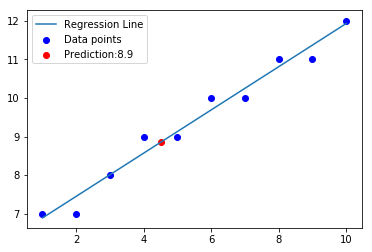

In [41]:
plt.scatter(X, Y, color='blue', label="Data points")
plt.plot(X, regression_line, label= "Regression Line")
plt.scatter(x_new, y_hat, color = 'red', label= "Prediction:" + str(np.round(y_hat,1)))
plt.legend()
plt.show();

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 